In [1]:
#importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("/content/sample_data/Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
##checking null values
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [4]:
## checking all the categories
df['Gender'].value_counts()

,count
Gender,
Male,2916
Female,1817
Fe Male,155


In [5]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,2340
Divorced,950
Single,916
Unmarried,682


In [6]:
df['TypeofContact'].value_counts()

,count
TypeofContact,
Self Enquiry,3444
Company Invited,1419


In [7]:
df['Gender']=df['Gender'].replace('Fe Male','Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [8]:
df['Gender'].value_counts()

,count
Gender,
Male,2916
Female,1972


In [9]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [10]:
##checking missing values
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
  print(feature,np.round(df[feature].isnull().mean()*100,5),'% missing values')


Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [11]:
#statistics on numerical columns (null cols)
df[features_with_na].select_dtypes(exclude=['object']).describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


#Imputing Null Values
1. Impute Median value for Age column
2. Impute Mode for Type of Contact
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberofChildrenVisiting
8. Impute Median for MonthlyIncome

In [12]:
#Age
df.Age.fillna(df.Age.median(),inplace=True)

#TypeofContract
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

#Duration of Pitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

#NumberofFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)

#PreferredProperty
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

#NumberofTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

#NumberofChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [13]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


In [14]:
df.drop('CustomerID',inplace=True,axis=1)

Feature Engineering

In [15]:
#create new column for feature
df['TotalVisits']=df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'],inplace=True,axis=1)

In [16]:
#get all numeric features
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
print('Number of Numerical features :' , len(num_features))

Number of Numerical features : 12


In [17]:
#categorical features
catch_features=[feature for feature in df.columns if df[feature].dtype=='O']
print('Number of Categorical features :' , len(catch_features))

Number of Categorical features : 6


In [18]:
#discrete features
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Number of Discrete features :' , len(discrete_features))

Number of Discrete features : 9


In [19]:
#continuous features
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Number of Continuous features :' , len(continuous_features))

Number of Continuous features : 3


Train Test Split and Model Selection

In [20]:
from sklearn.model_selection import train_test_split
X=df.drop('ProdTaken',axis=1)
y=df['ProdTaken']

In [21]:
y.value_counts()

,count
ProdTaken,
0,3968
1,920


In [22]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisits
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [23]:
#separate dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((3910, 17), (978, 17))

In [24]:
#create column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [25]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisits'],
      dtype='object'))])

In [26]:
#applying transformation
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

Machine Learning Training

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score

In [28]:
models={
    'Random Forest':RandomForestClassifier(),
    'Logistic Regression':LogisticRegression(),
        'Decision Tree':DecisionTreeClassifier(),
}
for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(X_train,y_train)

  #make prediction
  y_train_pred=model.predict(X_train)
  y_test_pred=model.predict(X_test)

  #training set performance
  model_train_accuracy=accuracy_score(y_train,y_train_pred)
  model_train_precision=precision_score(y_train,y_train_pred)
  model_train_recall=recall_score(y_train,y_train_pred)
  model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
  model_train_roc=roc_auc_score(y_train,y_train_pred)

  #test set performance
  model_test_accuracy=accuracy_score(y_test,y_test_pred)
  model_test_precision=precision_score(y_test,y_test_pred)
  model_test_recall=recall_score(y_test,y_test_pred)
  model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
  model_test_roc=roc_auc_score(y_test,y_test_pred)

  print(list(models.keys())[i])

  print('Model performance for Training set')
  print('-Accuracy: {:.4f}'.format(model_train_accuracy))
  print('-Precision: {:.4f}'.format(model_train_precision))
  print('-Recall: {:.4f}'.format(model_train_recall))
  print('-F1 Score: {:.4f}'.format(model_train_f1))
  print('-ROC AUC Score: {:.4f}'.format(model_train_roc))

  print('----------------------------------')
  print('Model performance for Test set')
  print('-Accuracy: {:.4f}'.format(model_test_accuracy))
  print('-Precision: {:.4f}'.format(model_test_precision))
  print('-Recall: {:.4f}'.format(model_test_recall))
  print('-F1 Score: {:.4f}'.format(model_test_f1))
  print('-ROC AUC Score: {:.4f}'.format(model_test_roc))
  print('='*35)
  print('\n')

Random Forest
Model performance for Training set
-Accuracy: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-F1 Score: 1.0000
-ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
-Accuracy: 0.9294
-Precision: 0.9621
-Recall: 0.6649
-F1 Score: 0.9243
-ROC AUC Score: 0.8293


Logistic Regression
Model performance for Training set
-Accuracy: 0.8460
-Precision: 0.7016
-Recall: 0.3032
-F1 Score: 0.8202
-ROC AUC Score: 0.6368
----------------------------------
Model performance for Test set
-Accuracy: 0.8364
-Precision: 0.6914
-Recall: 0.2932
-F1 Score: 0.8087
-ROC AUC Score: 0.6307


Decision Tree
Model performance for Training set
-Accuracy: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-F1 Score: 1.0000
-ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
-Accuracy: 0.9233
-Precision: 0.8187
-Recall: 0.7801
-F1 Score: 0.9226
-ROC AUC Score: 0.8691




Hyperparameter Training

In [54]:
rf_params={"max_depth": [8,10,12,14],
           "max_features": ['sqrt','log2',0.3,0.5],
           "min_samples_split": [7, 10,13],
           "min_samples_leaf": [3, 5,7],
           "n_estimators": [200,300,400,500],
            "class_weight": [None, "balanced"]}

In [55]:
#models list for hyperparameter tuning
randomcv_models=[("RF",RandomForestClassifier(),rf_params)]


In [56]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}
for name,model,params in randomcv_models:
      random=RandomizedSearchCV(estimator=model,
                                 param_distributions=params,
                                 n_iter=100,
                                 cv=3,
                                 verbose=2,
                                 n_jobs=-1)
      random.fit(X_train,y_train)
      model_param[name]=random.best_params_
for model_name in model_param:
  print(f"Best parameters for {model_name} are: {model_param[model_name]}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for RF are: {'n_estimators': 400, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 0.3, 'max_depth': 12, 'class_weight': 'balanced'}


In [61]:
model={
    "Random Forest": RandomForestClassifier(n_estimators= 400,
                                            min_samples_split= 7,
                                            min_samples_leaf= 3,
                                            max_features= 0.3,
                                            max_depth = 12,
                                            class_weight='balanced',
                                            max_samples=0.9,
                                            random_state=42)
}

for i in range(len(list(model))):
  model = list(model.values())[i]
  model.fit(X_train,y_train)

  #make prediction
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  #training set performance
  model_train_accuracy=accuracy_score(y_train,y_train_pred)
  model_train_precision=precision_score(y_train,y_train_pred)
  model_train_recall=recall_score(y_train,y_train_pred)
  model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
  model_train_roc=roc_auc_score(y_train,y_train_pred)

  #test set performance
  model_test_accuracy=accuracy_score(y_test,y_test_pred)
  model_test_precision=precision_score(y_test,y_test_pred)
  model_test_recall=recall_score(y_test,y_test_pred)
  model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
  model_test_roc=roc_auc_score(y_test,y_test_pred)

  print(list(models.keys())[i])

  print('Model performance for Training set')
  print('-Accuracy: {:.4f}'.format(model_train_accuracy))
  print('-Precision: {:.4f}'.format(model_train_precision))
  print('-Recall: {:.4f}'.format(model_train_recall))
  print('-F1 Score: {:.4f}'.format(model_train_f1))
  print('-ROC AUC Score: {:.4f}'.format(model_train_roc))

  print('----------------------------------')
  print('Model performance for Test set')
  print('-Accuracy: {:.4f}'.format(model_test_accuracy))
  print('-Precision: {:.4f}'.format(model_test_precision))
  print('-Recall: {:.4f}'.format(model_test_recall))
  print('-F1 Score: {:.4f}'.format(model_test_f1))
  print('-ROC AUC Score: {:.4f}'.format(model_test_roc))
  print('='*35)
  print('\n')

Random Forest
Model performance for Training set
-Accuracy: 0.9788
-Precision: 0.9195
-Recall: 0.9712
-F1 Score: 0.9790
-ROC AUC Score: 0.9759
----------------------------------
Model performance for Test set
-Accuracy: 0.9018
-Precision: 0.7811
-Recall: 0.6911
-F1 Score: 0.8995
-ROC AUC Score: 0.8220




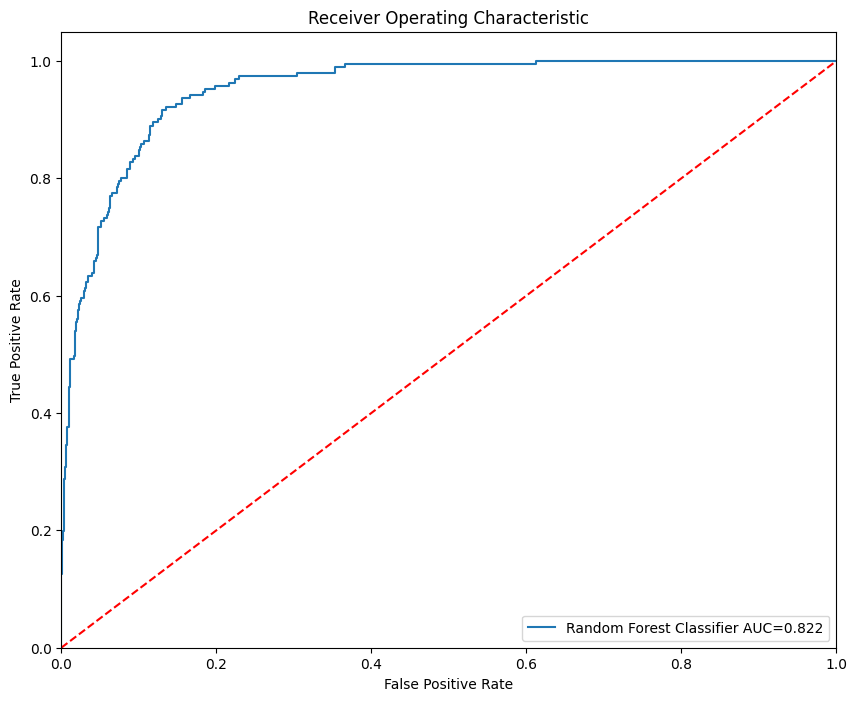

In [62]:
#plot RUC AUC curve
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

#adding models to the list

auc_models=[{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators= 400,
                                            min_samples_split= 7,
                                            min_samples_leaf= 3,
                                            max_features= 0.3,
                                            max_depth = 12,
                                            class_weight='balanced',
                                            max_samples=0.9,
                                            random_state=42),
    'auc': 0.8220
},
]


#create loop through all model
for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
#computing FP rate adn TP rate
fpr,tpr,threshold = roc_curve(y_test,model.predict_proba(X_test)[:,1])

#calculating are under curve
plt.plot(fpr,tpr,label=f'{algo["label"]} AUC={algo["auc"]}')

#custom setting for plot
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("roc_auc.png")
plt.show()